In [1]:
import pandas as pd
import numpy as np
import time
from copy import deepcopy
from pprint import pprint

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, \
GradientBoostingClassifier, AdaBoostClassifier

from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from evaluate_metrics import plot_learning_curve

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

### Prepare data

In [2]:
dftrain = pd.read_csv('../data/train.mice.dum.csv')
dftest = pd.read_csv('../data/test.mice.dum.csv')
# IMPORTANT shuffle data
dftrain = dftrain.reindex(np.random.permutation(dftrain.index))
dftrain.shape, dftest.shape

((10500, 106), (38342, 106))

In [3]:
# specify index, predictors and target
index  = 'Id'
target = 'earn_over_4k_euros_per_year'
predictors = [x for x in dftrain.columns if x not in [target,index]]
# base random forest classifier to compare missing value methods
rfc = RandomForestClassifier()

# convert to categorical data
continuous_predictors = ['age','income_from_investment_sources',\
                         'losses_from_investment_sources',\
                         'number_of_years_of_education',\
                         'working_hours_per_week']
categorical_predictors = [col for col in predictors if col not in continuous_predictors]

# for col in categorical_predictors:
# #     dftrain[col] = dftrain[col].astype('int64')
#     dftrain[col] = dftrain[col].astype('category')
    
# #     dftest[col] = dftrain[col].astype('int64')
#     dftest[col] = dftrain[col].astype('category')

### Fill in missing value

In [9]:
df = pd.concat([dftrain,dftest], ignore_index=True)
dftrain_ffill = dftrain.fillna(value=df.mode().iloc[0])
dftest_ffill  = dftest.fillna(value=df.mode().iloc[0])

### Helper functions

In [7]:
def modelfit(estimator, model, dftrain, predictors, useTrainCV=True, cv_folds=10):
    """fit model with evaluation"""
    # cv
#     tic = time.clock()
    cv_scores = cross_validation.cross_val_score(
        estimator=estimator, \
        X=dftrain[predictors].values, \
        y=dftrain[target].values, \
        scoring='accuracy',
        cv=10)
#     toc = time.clock()
    
    print 'Model report ({})'.format(model)
    print 'Accuracy (CV): {}'.format(np.mean(cv_scores))
    print 'Standard deviation: {}'.format(np.std(cv_scores))
#     print 'Time (Avg.): {}'.format((toc - tic) / cv_folds)
    
    
    
    # plot learning curve
    if True:
        lc = plot_learning_curve(estimator=estimator, \
                            title=model, \
                            X=dftrain[predictors].values, \
                            y=dftrain[target].values,
                            n_jobs=-1,
                           )    

    
    
    # fit
    predictor = estimator.fit(dftrain[predictors].values, dftrain[target].values)
    
    return predictor
    

### LDA

Model report (Linear Discriminant Analysis)
Accuracy (CV): 0.831523809524
Standard deviation: 0.0064656777419
Time (Avg.): 0.2001395


/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view 

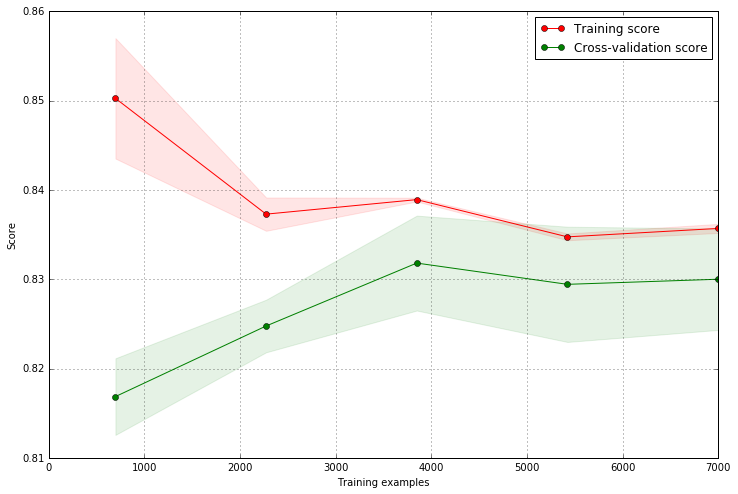

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = 'Linear Discriminant Analysis'

ldc = LinearDiscriminantAnalysis()

ldc_predictor = modelfit(ldc, model, dftrain_ffill, predictors)

Model report (Quadratic Discriminant Analysis)
Accuracy (CV): 0.297047619048
Standard deviation: 0.134970526723
Time (Avg.): 0.1763846


/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view 

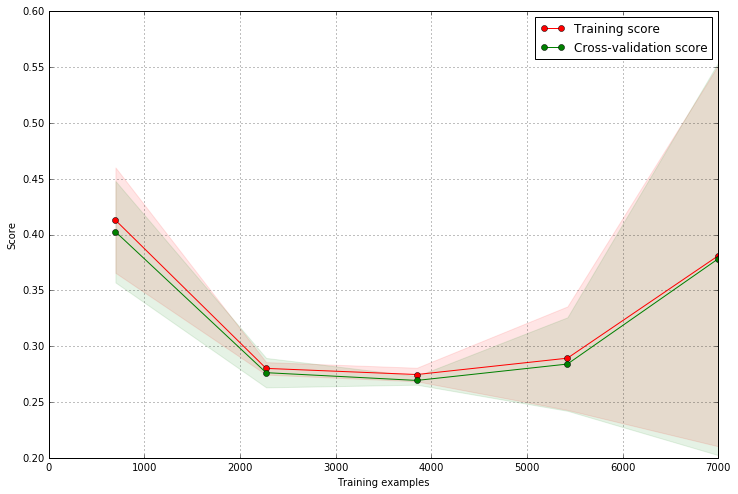

In [83]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = 'Quadratic Discriminant Analysis'

qdc = QuadraticDiscriminantAnalysis()

qdc_predictor = modelfit(qdc, model, dftrain_ffill, predictors)

### NMC

Model report (Nearest Neirghbor)
Accuracy (CV): 0.796761904762
Standard deviation: 0.00795907901553
Time (Avg.): 0.7436851


/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view 

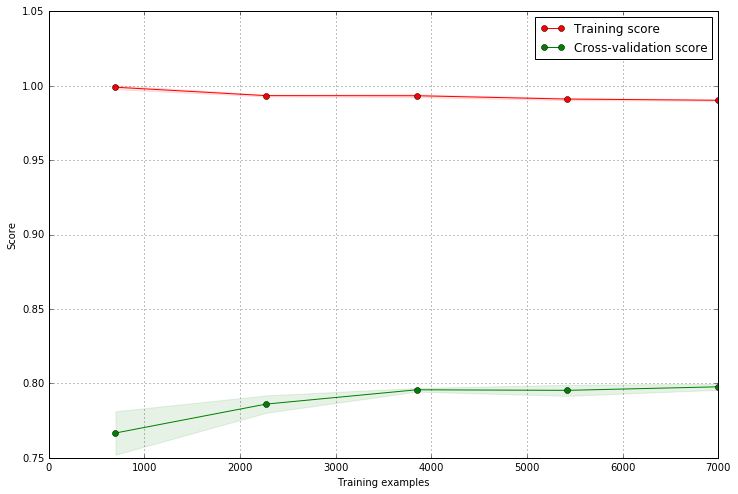

In [86]:
from sklearn.neighbors import KNeighborsClassifier


model = 'Nearest Neirghbor'

nmc = KNeighborsClassifier(n_neighbors=1)

nmc_predictor = modelfit(nmc, model, dftrain_ffill, predictors)

### Naive Bayes

Model report (GaussianNB Naive Bayes)
Accuracy (CV): 0.743904761905
Standard deviation: 0.0136788563525
Time (Avg.): 0.022335


/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view 

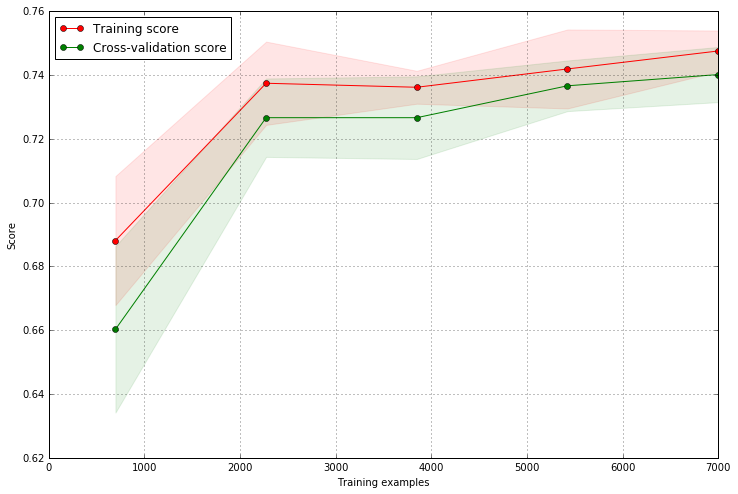

In [85]:
from sklearn.naive_bayes import GaussianNB

model = 'GaussianNB Naive Bayes'

nbc = GaussianNB()

nbc_predictor = modelfit(nbc, model, dftrain_ffill, predictors)

### SVM

Model report (SVM)
Accuracy (CV): 0.839904761905
Standard deviation: 0.0123475740546


/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view 

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/jihong/anaconda2/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/home/jihong/anaconda2/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x7f10c7199830, file "/...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/home/jihong...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x7f10c7199830, file "/...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/home/jihong...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    591         
    592         If a global instance already exists, this reinitializes and starts it
    593         """
    594         app = cls.instance(**kwargs)
    595         app.initialize(argv)
--> 596         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    597 
    598 #-----------------------------------------------------------------------------
    599 # utility functions, for convenience
    600 #-----------------------------------------------------------------------------

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    437         
    438         if self.poller is not None:
    439             self.poller.start()
    440         self.kernel.start()
    441         try:
--> 442             ioloop.IOLoop.instance().start()
    443         except KeyboardInterrupt:
    444             pass
    445 
    446 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    157             PollIOLoop.configure(ZMQIOLoop)
    158         return PollIOLoop.current(*args, **kwargs)
    159     
    160     def start(self):
    161         try:
--> 162             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    163         except ZMQError as e:
    164             if e.errno == ETERM:
    165                 # quietly return on ETERM
    166                 pass

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    878                 self._events.update(event_pairs)
    879                 while self._events:
    880                     fd, events = self._events.popitem()
    881                     try:
    882                         fd_obj, handler_func = self._handlers[fd]
--> 883                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    884                     except (OSError, IOError) as e:
    885                         if errno_from_exception(e) == errno.EPIPE:
    886                             # Happens when the client closes the connection
    887                             pass

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-08-12T13:19:51.882704', u'msg_id': u'B956518E8A074FE4B1FF5A6427F9CDEC', u'msg_type': u'execute_request', u'session': u'77D5C295E1CC40E4B65DFC50F79BA603', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'B956518E8A074FE4B1FF5A6427F9CDEC', 'msg_type': u'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['77D5C295E1CC40E4B65DFC50F79BA603']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-08-12T13:19:51.882704', u'msg_id': u'B956518E8A074FE4B1FF5A6427F9CDEC', u'msg_type': u'execute_request', u'session': u'77D5C295E1CC40E4B65DFC50F79BA603', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'B956518E8A074FE4B1FF5A6427F9CDEC', 'msg_type': u'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['77D5C295E1CC40E4B65DFC50F79BA603'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-08-12T13:19:51.882704', u'msg_id': u'B956518E8A074FE4B1FF5A6427F9CDEC', u'msg_type': u'execute_request', u'session': u'77D5C295E1CC40E4B65DFC50F79BA603', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'B956518E8A074FE4B1FF5A6427F9CDEC', 'msg_type': u'execute_request', 'parent_header': {}})
    386         if not silent:
    387             self.execution_count += 1
    388             self._publish_execute_input(code, parent, self.execution_count)
    389 
    390         reply_content = self.do_execute(code, silent, store_history,
--> 391                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    392 
    393         # Flush output before sending the reply.
    394         sys.stdout.flush()
    395         sys.stderr.flush()

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    194 
    195         reply_content = {}
    196         # FIXME: the shell calls the exception handler itself.
    197         shell._reply_content = None
    198         try:
--> 199             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)"
        store_history = True
        silent = False
    200         except:
    201             status = u'error'
    202             # FIXME: this code right now isn't being used yet by default,
    203             # because the run_cell() call above directly fires off exception

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)", store_history=True, silent=False, shell_futures=True)
   2718                 self.displayhook.exec_result = result
   2719 
   2720                 # Execute the user code
   2721                 interactivity = "none" if silent else self.ast_node_interactivity
   2722                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2723                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2724 
   2725                 # Reset this so later displayed values do not modify the
   2726                 # ExecutionResult
   2727                 self.displayhook.exec_result = None

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-8-d30378621783>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   2820 
   2821         try:
   2822             for i, node in enumerate(to_run_exec):
   2823                 mod = ast.Module([node])
   2824                 code = compiler(mod, cell_name, "exec")
-> 2825                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f1081c80c30, file "<ipython-input-8-d30378621783>", line 13>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   2826                     return True
   2827 
   2828             for i, node in enumerate(to_run_interactive):
   2829                 mod = ast.Interactive([node])

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f1081c80c30, file "<ipython-input-8-d30378621783>", line 13>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   2880         outflag = 1  # happens in more places, so it's easier as default
   2881         try:
   2882             try:
   2883                 self.hooks.pre_run_code_hook()
   2884                 #rprint('Running code', repr(code_obj)) # dbg
-> 2885                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f1081c80c30, file "<ipython-input-8-d30378621783>", line 13>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u"import pandas as pd\nimport numpy as np\nimpor...ort rcParams\nrcParams['figure.figsize'] = 12, 8", u"dftrain = pd.read_csv('../data/train.mice.dum....ion(dftrain.index))\ndftrain.shape, dftest.shape", u"# specify index, predictors and target\nindex ...   dftest[col] = dftrain[col].astype('category')", u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)", u'def modelfit(estimator, model, dftrain, predic...arget].values)\n    \n    return predictor\n    ', u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)", u'def modelfit(estimator, model, dftrain, predic...arget].values)\n    \n    return predictor\n    ', u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)"], 'Out': {2: ((10500, 106), (38342, 106))}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'XGBClassifier': <class 'xgboost.sklearn.XGBClassifier'>, '_': ((10500, 106), (38342, 106)), '_2': ((10500, 106), (38342, 106)), ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u"import pandas as pd\nimport numpy as np\nimpor...ort rcParams\nrcParams['figure.figsize'] = 12, 8", u"dftrain = pd.read_csv('../data/train.mice.dum....ion(dftrain.index))\ndftrain.shape, dftest.shape", u"# specify index, predictors and target\nindex ...   dftest[col] = dftrain[col].astype('category')", u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)", u'def modelfit(estimator, model, dftrain, predic...arget].values)\n    \n    return predictor\n    ', u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)", u'def modelfit(estimator, model, dftrain, predic...arget].values)\n    \n    return predictor\n    ', u"from sklearn.svm import SVC\n\ndftrain = pd.re... modelfit(svc, model, dftrain_ffill, predictors)"], 'Out': {2: ((10500, 106), (38342, 106))}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'XGBClassifier': <class 'xgboost.sklearn.XGBClassifier'>, '_': ((10500, 106), (38342, 106)), '_2': ((10500, 106), (38342, 106)), ...}
   2886             finally:
   2887                 # Reset our crash handler in place
   2888                 sys.excepthook = old_excepthook
   2889         except SystemExit as e:

...........................................................................
/home/jihong/workspace/jaggle/Final-Assignment-IN4320/src/<ipython-input-8-d30378621783> in <module>()
      8 
      9 model = 'SVM'
     10 
     11 svc = SVC(C=105,gamma=0.001)
     12 
---> 13 svc_predictor = modelfit(svc, model, dftrain_ffill, predictors)
     14 
     15 
     16 
     17 

...........................................................................
/home/jihong/workspace/jaggle/Final-Assignment-IN4320/src/<ipython-input-7-c137a6c612ca> in modelfit(estimator=SVC(C=105, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), model='SVM', dftrain=          Id        age  income_from_investment_...0               0.0  

[10500 rows x 106 columns], predictors=['age', 'income_from_investment_sources', 'losses_from_investment_sources', 'number_of_years_of_education', 'working_hours_per_week', 'education_2.0', 'education_3.0', 'education_4.0', 'education_5.0', 'education_6.0', 'education_7.0', 'education_8.0', 'education_18.0', 'education_19.0', 'education_20.0', 'education_29.0', 'education_42.0', 'education_63.0', 'education_78.0', 'education_81.0', ...], useTrainCV=True, cv_folds=10)
     18     
     19     
     20     # plot learning curve
     21     if True:
     22         lc = plot_learning_curve(estimator=estimator,                             title=model,                             X=dftrain[predictors].values,                             y=dftrain[target].values,
---> 23                             n_jobs=-1,
     24                            )    
     25 
     26     
     27     

...........................................................................
/home/jihong/workspace/jaggle/Final-Assignment-IN4320/src/evaluate_metrics.py in plot_learning_curve(estimator=SVC(C=105, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), title='SVM', X=array([[  12.414     ,  692.01      ,  -13.16606...        ,
           0.        ,    0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1]), ylim=None, cv=None, n_jobs=-1, train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]))
     44     if ylim is not None:
     45         plt.ylim(*ylim)
     46     plt.xlabel("Training examples")
     47     plt.ylabel("Score")
     48     train_sizes, train_scores, test_scores = learning_curve.learning_curve(
---> 49         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        estimator = SVC(C=105, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False)
        X = array([[  12.414     ,  692.01      ,  -13.16606...        ,
           0.        ,    0.        ]])
        y = array([0, 0, 0, ..., 1, 1, 1])
        cv = None
        n_jobs = -1
        train_sizes = array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ])
     50     train_scores_mean = np.mean(train_scores, axis=1)
     51     train_scores_std = np.std(train_scores, axis=1)
     52     test_scores_mean = np.mean(test_scores, axis=1)
     53     test_scores_std = np.std(test_scores, axis=1)

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py in learning_curve(estimator=SVC(C=105, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), X=array([[  12.414     ,  692.01      ,  -13.16606...        ,
           0.        ,    0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1]), train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]), cv=[(array([ 2667,  2668,  2669, ..., 10497, 10498, 10499]), array([   0,    1,    2, ..., 8831, 8832, 8833])), (array([    0,     1,     2, ..., 10497, 10498, 10499]), array([2667, 2668, 2669, ..., 9664, 9665, 9666])), (array([   0,    1,    2, ..., 9664, 9665, 9666]), array([ 5334,  5335,  5336, ..., 10497, 10498, 10499]))], scoring=None, exploit_incremental_learning=False, n_jobs=-1, pre_dispatch='all', verbose=0)
    148             scorer, verbose) for train, test in cv)
    149     else:
    150         out = parallel(delayed(_fit_and_score)(
    151             clone(estimator), X, y, scorer, train[:n_train_samples], test,
    152             verbose, parameters=None, fit_params=None, return_train_score=True)
--> 153             for train, test in cv for n_train_samples in train_sizes_abs)
        cv = [(array([ 2667,  2668,  2669, ..., 10497, 10498, 10499]), array([   0,    1,    2, ..., 8831, 8832, 8833])), (array([    0,     1,     2, ..., 10497, 10498, 10499]), array([2667, 2668, 2669, ..., 9664, 9665, 9666])), (array([   0,    1,    2, ..., 9664, 9665, 9666]), array([ 5334,  5335,  5336, ..., 10497, 10498, 10499]))]
    154         out = np.array(out)[:, :2]
    155         n_cv_folds = out.shape[0] // n_unique_ticks
    156         out = out.reshape(n_cv_folds, n_unique_ticks, 2)
    157 

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    805             if pre_dispatch == "all" or n_jobs == 1:
    806                 # The iterable was consumed all at once by the above for loop.
    807                 # No need to wait for async callbacks to trigger to
    808                 # consumption.
    809                 self._iterating = False
--> 810             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    811             # Make sure that we get a last message telling us we are done
    812             elapsed_time = time.time() - self._start_time
    813             self._print('Done %3i out of %3i | elapsed: %s finished',
    814                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Aug 12 13:21:24 2016
PID: 6842                  Python 2.7.12: /home/jihong/anaconda2/bin/python
...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
     67     def __init__(self, iterator_slice):
     68         self.items = list(iterator_slice)
     69         self._size = len(self.items)
     70 
     71     def __call__(self):
---> 72         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (SVC(C=105, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), memmap([[  12.414     ,  692.01      ,  -13.1660...        ,
           0.        ,    0.        ]]), array([0, 0, 0, ..., 1, 1, 1]), <function _passthrough_scorer>, array([2667, 2668, 2669, 2670, 2671, 2672, 2673,...3359,
       3360, 3361, 3362, 3363, 3364, 3365]), array([   0,    1,    2, ..., 8831, 8832, 8833]), 0)
        kwargs = {'fit_params': None, 'parameters': None, 'return_train_score': True}
        self.items = [(<function _fit_and_score>, (SVC(C=105, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), memmap([[  12.414     ,  692.01      ,  -13.1660...        ,
           0.        ,    0.        ]]), array([0, 0, 0, ..., 1, 1, 1]), <function _passthrough_scorer>, array([2667, 2668, 2669, 2670, 2671, 2672, 2673,...3359,
       3360, 3361, 3362, 3363, 3364, 3365]), array([   0,    1,    2, ..., 8831, 8832, 8833]), 0), {'fit_params': None, 'parameters': None, 'return_train_score': True})]
     73 
     74     def __len__(self):
     75         return self._size
     76 

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py in _fit_and_score(estimator=SVC(C=105, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), X=memmap([[  12.414     ,  692.01      ,  -13.1660...        ,
           0.        ,    0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1]), scorer=<function _passthrough_scorer>, train=array([2667, 2668, 2669, 2670, 2671, 2672, 2673,...3359,
       3360, 3361, 3362, 3363, 3364, 3365]), test=array([   0,    1,    2, ..., 8831, 8832, 8833]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, error_score='raise')
   1526 
   1527     try:
   1528         if y_train is None:
   1529             estimator.fit(X_train, **fit_params)
   1530         else:
-> 1531             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method SVC.fit of SVC(C=105, cache_size=2...one, shrinking=True,
  tol=0.001, verbose=False)>
        X_train = memmap([[ 12.414     ,   0.        ,   0.       ...0.        ,
          0.        ,   0.        ]])
        y_train = array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])
        fit_params = {}
   1532 
   1533     except Exception as e:
   1534         if error_score == 'raise':
   1535             raise

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py in fit(self=SVC(C=105, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), X=array([[ 12.414     ,   0.        ,   0.        ...0.        ,
          0.        ,   0.        ]]), y=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0]), sample_weight=None)
    146         if sparse and self.kernel == "precomputed":
    147             raise TypeError("Sparse precomputed kernels are not supported.")
    148         self._sparse = sparse and not callable(self.kernel)
    149 
    150         X = check_array(X, accept_sparse='csr', dtype=np.float64, order='C')
--> 151         y = self._validate_targets(y)
        y = array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])
        self._validate_targets = <bound method SVC._validate_targets of SVC(C=105...one, shrinking=True,
  tol=0.001, verbose=False)>
    152 
    153         sample_weight = np.asarray([]
    154                                    if sample_weight is None
    155                                    else sample_weight, dtype=np.float64)

...........................................................................
/home/jihong/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py in _validate_targets(self=SVC(C=105, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), y=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0]))
    516         cls, y = np.unique(y_, return_inverse=True)
    517         self.class_weight_ = compute_class_weight(self.class_weight, cls, y_)
    518         if len(cls) < 2:
    519             raise ValueError(
    520                 "The number of classes has to be greater than one; got %d"
--> 521                 % len(cls))
        cls = array([0])
    522 
    523         self.classes_ = cls
    524 
    525         return np.asarray(y, dtype=np.float64, order='C')

ValueError: The number of classes has to be greater than one; got 1
___________________________________________________________________________

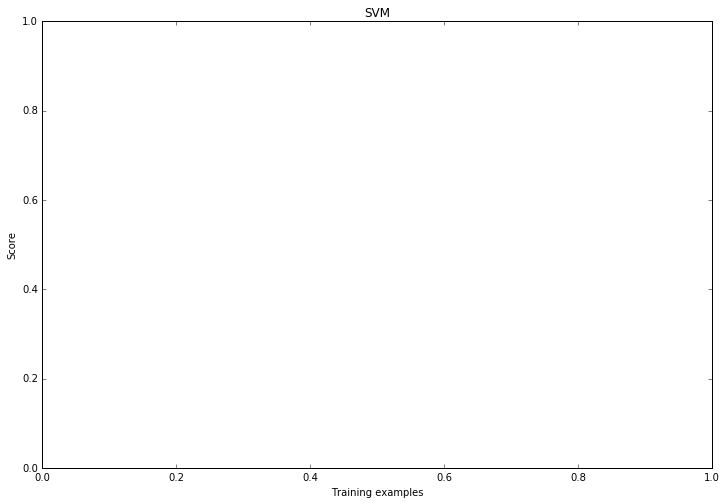

In [8]:
from sklearn.svm import SVC

dftrain = pd.read_csv('../data/train.mice.dum.csv')
dftest = pd.read_csv('../data/test.mice.dum.csv')

dftrain_ffill = dftrain
# dftrain_ffill[dftrain_ffill<0]=0

model = 'SVM'

# svc = SVC(C=105,gamma=0.001)
svc = SVC()

svc_predictor = modelfit(svc, model, dftrain_ffill, predictors)

### Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = 'Decision Tree Classifier'

dtc = DecisionTreeClassifier()

# dtc_predictor = modelfit(dtc, model, dftrain_ffill, predictors)

Model report (RandomForestClassifier)
Accuracy (CV): 0.82780952381
Standard deviation: 0.0131262835459
Time (Avg.): 0.1086073


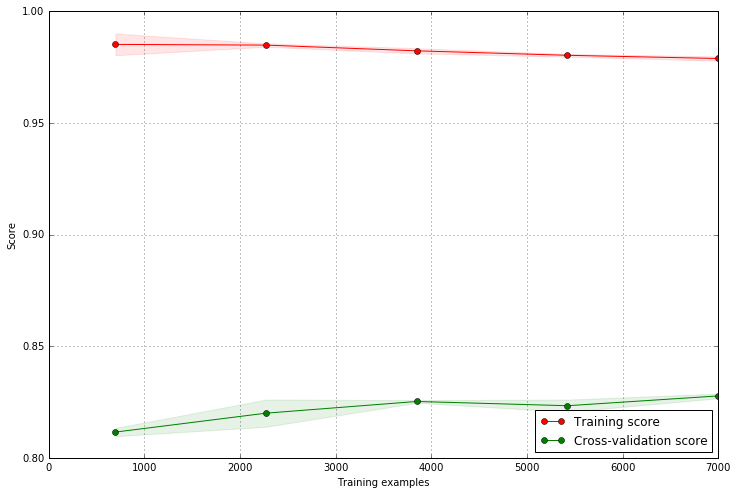

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = 'RandomForestClassifier'
rfc = RandomForestClassifier()

_ = modelfit(rfc, model, dftrain_ffill, predictors)

In [20]:
from sklearn.ensemble import AdaBoostClassifier

model = 'AdaBoostClassifier'
abc = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1)
# _= modelfit(abc, model, dftrain_ffill, predictors)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
model = 'GradientBoostingClassifier'

gbc = GradientBoostingClassifier()

# _ = modelfit(gbc, model, dftrain_ffill, predictors)

Model report (Xgboost)
Accuracy (CV): 0.856285714286
Standard deviation: 0.011471743853
Time (Avg.): 6.1866087


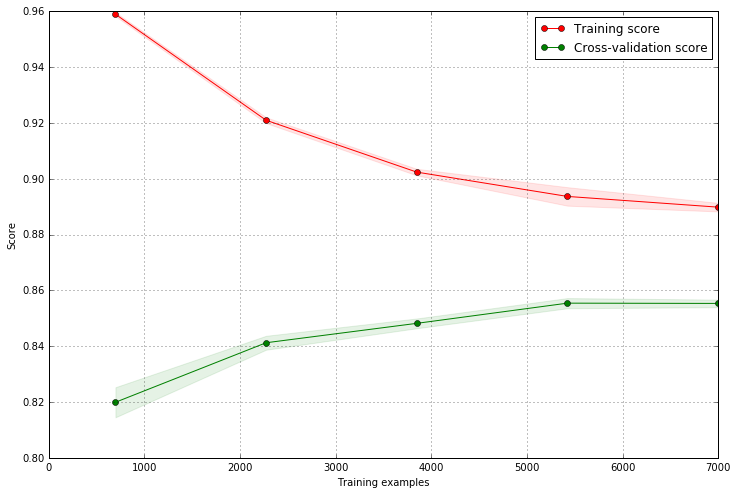

In [53]:
from xgboost.sklearn import XGBClassifier
model = 'Xgboost'
xgb = XGBClassifier(
        learning_rate    = 0.1,
        n_estimators     = 160,
        max_depth        = 6,
        min_child_weight = 1,
        gamma            = 0.3,
        subsample        = 0.8,
        colsample_bytree = 0.5,
        reg_alpha        = 0.05,
        objective        = 'binary:logistic',
        scale_pos_weight = 1,
        seed             = 27)
_ = modelfit(xgb, model, dftrain_ffill, predictors)

In [22]:
from sklearn.ensemble import VotingClassifier


model = 'Voting Classifier'

vcc = VotingClassifier(estimators=[('gbc', gbc), ('svc', svc), ('abc', abc), ('rfc',rfc)], voting='hard')

vcc.fit(dftrain_ffill[predictors].values, dftrain_ffill[target].values)


VotingClassifier(estimators=[('gbc', GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort=...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         voting='hard', weights=None)

In [26]:
predictions = vcc.predict(dftest_ffill[predictors].values)

In [27]:
predictions

array([0, 1, 0, ..., 0, 0, 1])

In [28]:
dftest_ffill['Prediction'] = pd.Series(predictions, index=dftest_ffill.index)

In [32]:
dftest_ffill[['Id','Prediction']].to_csv('../subm/entry_7',index=False)